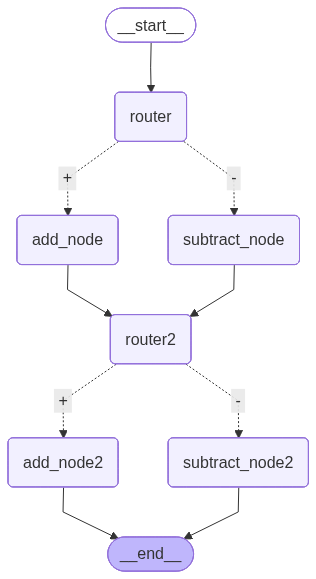

-
-


{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}

In [6]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END


# initialize the state schema
class AgentState(TypedDict):
    number1 : int
    operation : str
    number2 : int
    finalNumber : int
    

def adder(state : AgentState) -> AgentState:
    """This node adds the 2 numbers"""

    state["finalNumber"] = state["number1"] + state["number2"]

    return state

def subtractor(state : AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""

    state["finalNumber"] = state["number1"] - state["number2"]

    return state


def decide_next_node(state : AgentState) -> str:
    """This node will select the next node of the graph"""
    print(state["operation"])
    if state['operation'] == "+":
        return "+" # return an edge
    elif state['operation'] == "-":
        return "-"

        


# build the graph
graph = StateGraph(AgentState)

# add nodes
graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)

# graph.add_node("router", decide_next_node) we can't use this because this node is different from other two nodes, the two nodes return a state and this node doesn't return a node it's return an edge

graph.add_node("router", lambda state: state) # lambda says your input state will be your output state with no change

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router", # source node
    decide_next_node, # path

    # path map to define the edges
    {
        # "edge" : "node"
        "+" : "add_node",
        "-" : "subtract_node"
    }
)




graph.add_node("router2", lambda state: state) # lambda says your input state will be your output state with no change
graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")

graph.add_node("add_node2", adder)
graph.add_node("subtract_node2", subtractor)

graph.add_conditional_edges(
    "router2", # source node
    decide_next_node, # path

    # path map to define the edges
    {
        # "edge" : "node"
        "+" : "add_node2",
        "-" : "subtract_node2",
        # "default" : END # default edge if no match
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)


app = graph.compile()


from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


# another way to invoke
init_state_1 = AgentState(number1=10, number2=5, operation="-")
app.invoke(init_state_1)

